## 3절. 데이터 전처리

### 3.1 표준화

In [4]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1]
iris_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# scale
from sklearn.preprocessing import scale

iris_scaled = scale(iris_X)
iris_scaled[:5, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [6]:
# 표준화된 데이터 평균
iris_scaled.mean(axis=0)

array([-4.73695157e-16, -7.81597009e-16, -4.26325641e-16, -4.73695157e-16])

In [7]:
for scaled_mean in iris_scaled.mean(axis=0):
    print('{:10.9f}'.format(scaled_mean))

-0.000000000
-0.000000000
-0.000000000
-0.000000000


In [8]:
# 표준화한 데이터들의 표준절차 출력
iris_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [9]:
# robust scale
from sklearn.preprocessing import robust_scale

iris_robust_scaled = robust_scale(iris_X)
iris_robust_scaled[:5, :]

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333]])

In [10]:
# minmax scale
from sklearn.preprocessing import minmax_scale

iris_minmax_scaled = minmax_scale(iris_X)
iris_minmax_scaled[:5,:]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [12]:
# maxabs_scale
from sklearn.preprocessing import maxabs_scale

iris_maxabs_scaled = maxabs_scale(iris_X)
iris_maxabs_scaled[:5, :]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ]])

In [13]:
# minmax scale vs maxabs scale
import numpy as np

X = np.array([[ 1., -1., 2.],
                [ 2., 0., 0.],
                [ 0., 1., -1.]])

print(minmax_scale(X))
print(maxabs_scale(X))

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
[[ 0.5 -1.   1. ]
 [ 1.   0.   0. ]
 [ 0.   1.  -0.5]]


In [14]:
# 표준화 클래스
import seaborn as sns

iris = sns.load_dataset('iris')
iris.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
iris_scaled = sc.fit_transform(iris.iloc[:, :-1])
iris_scaled[:5, :]

# mean=0, std=1
print(iris_scaled.mean(axis=0))
print(iris_scaled.std(axis=0))

[-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16]
[1. 1. 1. 1.]


In [17]:
# 역 표준화
iris_origin = sc.inverse_transform(iris_scaled)
iris_origin[:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 3.2 인코딩

In [18]:
# label encoding
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

iris = sns.load_dataset("iris")

le = LabelEncoder()
le.fit(iris.species)

LabelEncoder()

In [19]:
# 종의 클래스 확인
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
# 종 정보 인코딩
species = le.transform(iris.species)
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# 인코딩된 종 정보 역변환
le.inverse_transform(species)

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [25]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(species.reshape(-1, 1)) # fit 함수의 인수는 2차원이어야 함

iris_onehot = enc.transform(species.reshape(-1, 1))
iris_onehot.toarray() # return 값은 희소행렬

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [26]:
import pandas as pd

pd.get_dummies(iris.species)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [27]:
# mean encoding
titanic = sns.load_dataset('titanic')
sex_mean = titanic.groupby('sex')['survived'].mean()
sex_mean

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [28]:
# 성별 평균 값 기존 데이터프레임에 sex_mean column 추가하여 적용
# 평균적으로 여자가 남자보다 survived에 대한 1값이 더 많음을 의미
titanic['sex_mean'] = titanic['sex'].map(sex_mean)
titanic[['sex', 'sex_mean']].head()

,sex,sex_mean
0,male,0.188908
1,female,0.742038
2,female,0.742038
3,female,0.742038
4,male,0.188908


In [29]:
titanic_pivot = titanic.pivot_table(columns='survived',
                                   index=titanic.index,
                                   values='sex_mean')
titanic_pivot.head()

survived,0,1
0,0.188908,NaN
1,NaN,0.742038
2,NaN,0.742038
3,NaN,0.742038
4,0.188908,NaN


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>]], dtype=object)

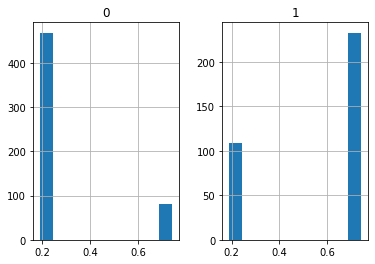

In [30]:
titanic_pivot.hist(bins=10)

### 3.3 결측값 처리

In [32]:
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1]
iris_Y = iris.iloc[:, -1]

import random
import warnings

warnings.filterwarnings('ignore')

random.seed(7902)
for col in range(4):
    iris_X.iloc[[random.sample(range(len(iris)), 20), col]] = float('nan')
    
iris_X

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,3.5,NaN,0.2
1,4.9,NaN,1.4,0.2
2,4.7,3.2,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,5.4,2.3


In [35]:
# 평균을 이용한 결측값 채움
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(iris_X)

SimpleImputer()

In [36]:
iris_new = imp_mean.transform(iris_X)
iris_new[:5,]

array([[5.79      , 3.5       , 3.74923077, 0.2       ],
       [4.9       , 3.07384615, 1.4       , 0.2       ],
       [4.7       , 3.2       , 3.74923077, 1.22615385],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.6       , 1.4       , 0.2       ]])

In [37]:
# 중앙값을 이용한 결측값 채움
imp_median = SimpleImputer(strategy='median')
imp_median.fit(iris_X)

SimpleImputer(strategy='median')

In [39]:
iris_median = imp_median.transform(iris_X)
iris_median[:5, ]

array([[5.7, 3.5, 4.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 4.4, 1.3],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [41]:
# 최빈값으로 결측치 채움
imp_mostfreq = SimpleImputer(strategy='most_frequent')
iris_mostfreq = imp_mostfreq.fit_transform(iris_X)
iris_mostfreq[:5, ]

array([[5. , 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.4, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [43]:
# pandas를 이용한 결측치 처리
import pandas as pd

iris_n = pd.concat([iris_X, iris_Y], axis=1)

# 종별 열 평균 계산
iris_mean_by_species = iris_n.groupby('species').mean()
iris_mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006667,3.454762,1.470455,0.246341
versicolor,5.863415,2.800000,4.280952,1.322727
virginica,6.522727,2.972340,5.520455,2.024444


In [45]:
import math

# 종별로 계산된 열의 평균 이용하여 결측값 바꿈
def na2mean(row):
    for i in range(4):
        if(math.isnan(row[i])):
            row[i] = iris_mean_by_species.loc[row['species'], row.index[i]]
    return row

iris_new = iris_n.apply(na2mean, axis=1)
iris_new.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.006667,3.500000,1.470455,0.200000,setosa
1,4.900000,3.454762,1.400000,0.200000,setosa
2,4.700000,3.200000,1.470455,0.246341,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


## 4절. 단순 데이터 분리

### 4.1 random.sample()

In [46]:
# 비복원 추출
# 한번 뽑힌 데이터는 다시 뽑히지 않는다...
import random

random.seed(10)
inds = random.sample(range(150), int(150*0.7))
len(inds)

105

In [49]:
import seaborn as sns
iris = sns.load_dataset("iris")

train = iris.loc[inds, :]
train.sort_index(inplace=True)
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa


In [50]:
test = iris.loc[~iris.index.isin(train.index)]
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
16,5.4,3.9,1.3,0.4,setosa


### 4.2 pandas.DataFrame.sample()

In [51]:
train = iris.sample(frac=0.7, random_state=1)
test = iris.loc[~iris.index.isin(train.index)]

In [52]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [53]:
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


### 4.3 sklearn.model_selection.train_test_split()

In [62]:
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1] # aka iris.species

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

print(test_y.value_counts())
train_X.shape, test_X.shape, train_y.shape, test_y.shape

versicolor    17
setosa        14
virginica     14
Name: species, dtype: int64


((105, 4), (45, 4), (105,), (45,))

### 4.4 층화추출법

In [78]:
# 모집단을 중복되지 않도록 층으로 나눈 다음 각 층에서 일정한 비율로 표본 추출하는 방법

iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.species

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3)
train_y.value_counts()

virginica     35
versicolor    35
setosa        35
Name: species, dtype: int64

## 5절. 모형 생성, 예측, 평가

### 5.1 모형 생성

In [79]:
# train, test dataset 생성
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [80]:
# 분류 모형(모델) 생성
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [81]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(50, 50, 20), max_iter=500, random_state=1)
mlp_model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(50, 50, 20), max_iter=500, random_state=1)

### 5.2 예측

In [82]:
dt_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [83]:
mlp_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype='<U10')

### 5.3 모형 평가

In [84]:
dt_pred_y = dt_model.predict(test_X)
# crosstab(index, column)
pd.crosstab(test_y, dt_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,1,12


In [85]:
dt_model.score(test_X, test_y)

0.9555555555555556

In [86]:
mlp_pred_y = mlp_model.predict(test_X)
pd.crosstab(test_y, mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,18,0
virginica,0,0,13


In [87]:
mlp_model.score(test_X, test_y)

1.0